<a href="https://colab.research.google.com/github/lukas0780/Analise-de-data-sets-de-ataque-do-cora-o-/blob/main/Analise_de_data_sets_de_ataque_do_cora%C3%A7%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

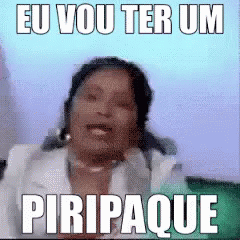


# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset




In [ ]:
!!pip install pandas
!!pip install numpy
!!pip install seaborn
!!pip install plotly==5.11.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import title
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt



# Carregando datasets

In [ ]:
dados = pd.read_csv('/content/heart.csv')


In [ ]:
dados.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


# contabilizando quantidade de resultados 

In [ ]:
resultado = dados["output"].value_counts()
resultado

1    165
0    138
Name: output, dtype: int64

# Criando matriz de correlação

In [ ]:
matrizdecorrrelação = dados.corr()
matrizdecorrrelação["output"]

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

#Gerando mapa de calor da matriz de correlação 

Text(0.5, 1.0, 'Mapa de calor de matriz de correlação')

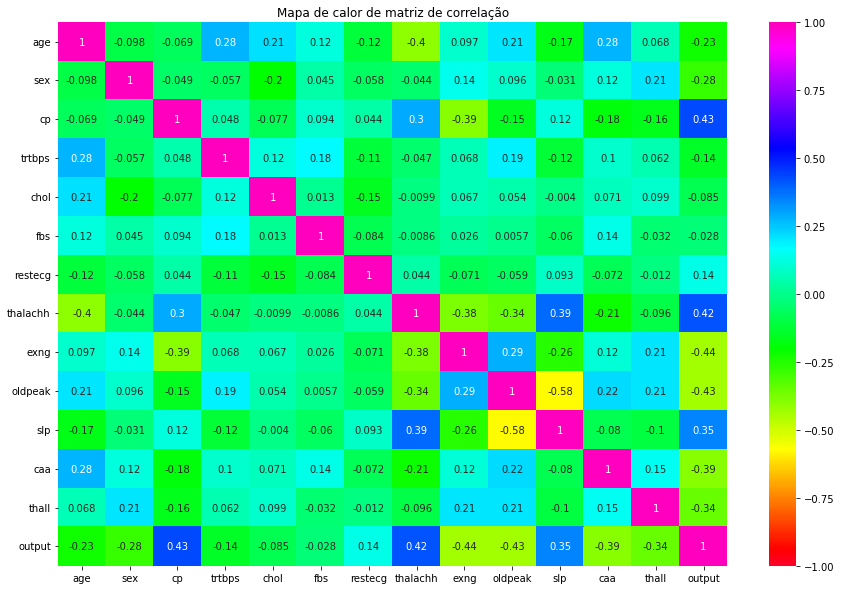

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(matrizdecorrrelação,annot= True,vmin=-1,vmax=1,cmap='gist_rainbow')
ax.set_title('Mapa de calor de matriz de correlação')


# Grafico para estudo de melhor k


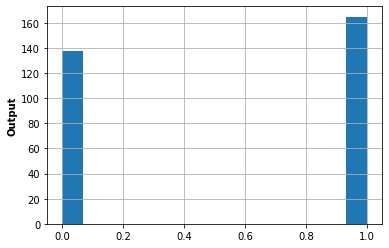

In [ ]:
dados["output"].hist(bins=15)
plt.ylabel("Output", fontweight='bold') 
plt.show()


# Calculado valores ausentes e apagando

In [ ]:
dados.isnull().sum().sort_values(ascending = False)[:10]

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
dtype: int64

# Criando treinamento de k-vizinhos

In [ ]:
y = dados["output"]
y = y.values

x = dados.drop("output", axis=1)
x = x.values

In [ ]:
#Biblioteca que faz o treinamento do algoritmo a partir de parametros
#definindo o tamanho da base de treinameto
from sklearn.model_selection import train_test_split

x_trein, x_teste, y_trein, y_test = train_test_split(
    x, y, train_size=0.2, random_state=12345)

In [ ]:
#x_trein - vetor de treinamento
#x_teste - vetor de testes - a ser classificado
#y_trein - rotulos do treinamento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_trein, y_trein) 


result_teste = knn.predict(x_teste)


In [ ]:
#importa as bibliotecas que iremos usar
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt

In [ ]:
#cria o objeto do encoder
le = preprocessing.LabelEncoder();

In [ ]:
#Traduz os resultados contidos no vetor de resultados
#para valores numéricos
result_teste_enc = le.fit_transform(result_teste) #vetor de resultados da predição
y_test_enc = le.fit_transform(y_test) #vetor de resultados que foi separado inicialmente

In [ ]:
mse = mean_squared_error(y_test_enc, result_teste_enc)
rmse = sqrt(mse)

print(rmse)


0.5879447357921312


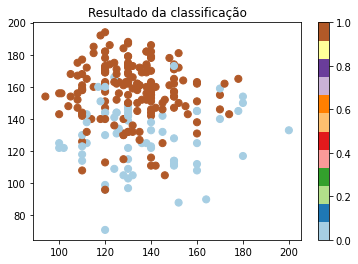

In [ ]:
import seaborn as sea
cmap = sea.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_teste[:,3],x_teste[:,7], c=result_teste, s=50, cmap='Paired'
)
f.colorbar(points)
plt.title("Resultado da classificação")
plt.show()

# Calcular acurácia 

In [ ]:
# Acurácia
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
acuracia = accuracy_score(y_test, result_teste)
print('Acurácia: %f' % acuracia)

Acurácia: 0.654321


# População de erros com K-VIZINHO

In [ ]:
errors = []
le = preprocessing.LabelEncoder()
i = []
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trein, y_trein)
    result_teste = knn.predict(x_teste)
    result_teste_enc = le.fit_transform(result_teste)
    y_test_enc = le.fit_transform(y_test)
    mse = mean_squared_error(y_test_enc, result_teste_enc)
    rmse = sqrt(mse)
    i.append(k)
    errors.append(rmse)

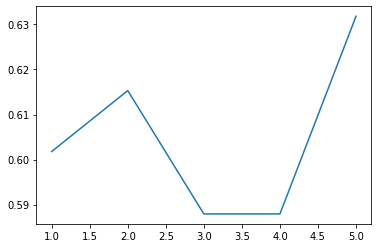

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
x = errors  
y = i
  
plt.plot(y, x)  
plt.show()  

teste de melhoraclassificação

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
standard_df = scaler.fit_transform(dados.drop(["output"], axis=1))

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split( standard_df, dados["output"], test_size=0.33, random_state=42)

for i in range(1,10):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    pred1 = knn1.predict(X_test)
    print(f"For Knn-{i}: \n")
    print(classification_report(y_test,pred1))
    print('====================================')

# graficos de Rotulos



age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000

```
# Isto está formatado como código
```



In [ ]:
import plotly.express as px

fig = px.scatter_3d(dados, x=1, y=, z=5)
fig.show()

# Registro inedito 

In [ ]:
dados.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
registro_inedito1 = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
registro_inedito2 = np.array([[37,1,2,130,250,0,0,187,0,3.5,0,0,2]]) 
registro_inedito3 = np.array([[41,0,1,130,204,0,0,172,0,1.4,0,0,2]]) 
registro_inedito4 = np.array([[56,1,1,120,236,0,0,178,0,0.8,2,0,2]])
registro_inedito5 = np.array([[57,0,0,120,354,0,0,163,1,0.6,2,0,2]])   

In [ ]:
print(knn.predict(registro_inedito1))
print(knn.predict(registro_inedito2))
print(knn.predict(registro_inedito3))
print(knn.predict(registro_inedito4))
print(knn.predict(registro_inedito5))

[1]
[1]
[1]
[1]
[1]


In [ ]:
dados.dtypes